# PHILOSOPHY NETWORKS:
## Extraction of Sentence-Co-Occurring Relationships among Concepts 
# Martin Heidegger's The Question Concerning Technology

In [1]:
import nltk

In [16]:

import os
import re
import csv
import itertools
from nltk.tokenize import sent_tokenize, word_tokenize
# from nltk.tag.stanford import StanfordNERTagger
# java_path = "C:/Program Files/Java/jdk1.8.0_05/bin/java.exe"
# os.environ['JAVAHOME'] = java_path


###### INPUT THE TITLE OF THE BOOK ########################
#file_name = raw_input("Title of the book:")

file_name ="Heidegger_TheQuestionConcerningTechnology"
f1 = open('Texts/'+file_name+'.txt','r')
#############################################################

book=f1.read()
#print book
          
###### INPUT THE REPLACEMENTS #################
#while True:
#    input_x=raw_input('Any key Replacement\n or quit :')
#    if (input_x == 'quit'):
#        break;
#    input1 = raw_input('String 1 :')
#    input2 = raw_input('to String 2 :') 
#    book.replace(input1,input2)
     

# book.replace("Grandmamma","Grandmother")
# book.replace("Mademoiselle","Mlle.")
# book.replace("Mlle. de Cominges","Mlle. Blanche")
# book.replace("Madame la General","Mdme. de Cominges")
# book.replace("Comtesse","Mdme. de Cominges")
# book.replace("Widow de Cominges","Mdme. de Cominges")

#############################################################

###### INPUT THE PERSON LIST ###############################
#unique_persons_list = [] 
#print "Insert person's names"
#while True:
#    input_person=raw_input("Insert person's names\n or quit :")
#    if (input_person == 'quit'):
#        break;
#    unique_persons_list.append(input_person)


unique_persons_list=["activity", "appearance", "bringing-forth", "causal", "challenging", "conceal", "danger",
    "end", "enframing", "essence", "human", "instrument", "man ", "means", "ordering",
    "physics", "presence", "real", "reveal", "science", "standing-reserve", "technology", 
    "thing", "truth"]



#############################################################

book_in_paragraphs = book.split('\n\n')
print len(book_in_paragraphs)


###### INPUT SELECTION SENTENCES PARAGRAPHS #################
#selection= input("1. sentences\n 2. paragraph\n")
selection=1
#############################################################

if selection ==1:
    ALL_sentences=sent_tokenize(book)
else:
    ALL_sentences=book_in_paragraphs
combinations_persons = list(itertools.combinations(unique_persons_list,2))

len_list = len(combinations_persons)

occurences =[]
######################################UTF 16####################
ALL_sentences2=[]
for sent in ALL_sentences:
    ALL_sentences2.append(sent.decode("utf-16", "replace"))
#################################################################   
    
for i in range(1,len_list):
    for j in ALL_sentences2:
        temp= list(combinations_persons[i])

        out  = re.compile(str(temp[0])+'(.*?)'+str(temp[1]), re.DOTALL |  re.IGNORECASE).findall(j)
        if out :
            occurences.append(str(temp[0])+' - '+ str(temp[1]))

        out2  = re.compile(str(temp[1])+'(.*?)'+str(temp[0]), re.DOTALL |  re.IGNORECASE).findall(j)
        if out2 :
            occurences.append(str(temp[1])+' - '+ str(temp[0]))



dict_occurences={}
for i in occurences:
    if i not in dict_occurences:
        dict_occurences[i] = 1
    else:
        dict_occurences[i] = dict_occurences[i]+1


print '------ Number of co-occurences of 2 names--------------'

for i in dict_occurences:
    print i, dict_occurences[i]

print "-----------------------------------"


0 activity
0 appearance
0 bringing-forth
0 causal
0 challenging
0 conceal
0 danger
0 end
0 enframing
0 essence
0 human
0 instrument
0 man 
0 means
0 ordering
0 physics
0 presence
0 real
0 reveal
0 science
0 standing-reserve
0 technology
0 thing
0 truth
1
------ Number of co-occurences of 2 names--------------
human - bringing-forth 1
thing - technology 1
science - presence 1
man  - standing-reserve 1
physics - human 1
activity - physics 1
causal - means 1
conceal - danger 1
real - conceal 1
appearance - ordering 1
thing - instrument 1
standing-reserve - instrument 1
science - real 1
essence - reveal 1
appearance - reveal 1
instrument - bringing-forth 1
conceal - essence 1
essence - means 1
enframing - presence 1
ordering - technology 1
danger - causal 1
instrument - man  1
ordering - physics 1
bringing-forth - truth 1
physics - means 1
truth - means 1
ordering - appearance 1
thing - appearance 1
standing-reserve - conceal 1
thing - end 1
science - man  1
means - danger 1
conceal - appe

In [26]:
# # book2=[]
# # for sent in book:
# #     book2.append(sent.decode("utf-16", "replace"))
# words = book.split()
# dwords=[]
# for i in words:
#     dwords.append(i.decode("utf-16", "replace"))
# for word in unique_persons_list:
#     print word, dwords.count(word)

list2=[]
for i in unique_persons_list:
    list2.append(i.decode("utf-8", "replace"))
words = book.split()
for word in list2:
    print word, words.count(word)

activity 0
appearance 0
bringing-forth 0
causal 0
challenging 0
conceal 0
danger 0
end 0
enframing 0
essence 0
human 0
instrument 0
man  0
means 0
ordering 0
physics 0
presence 0
real 0
reveal 0
science 0
standing-reserve 0
technology 0
thing 0
truth 0


/Users/mosesboudourides/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [3]:
%matplotlib inline 
%load_ext autoreload
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle

24
{'challenging': 23, 'danger': 23, 'enframing': 23, 'essence': 23, 'human': 23, 'technology': 23, 'causal': 23, 'bringing-forth': 23, 'end': 23, 'ordering': 23, 'presence': 23, 'man ': 23, 'instrument': 23, 'real': 23, 'means': 23, 'standing-reserve': 23, 'reveal': 23, 'conceal': 23, 'science': 23, 'appearance': 22, 'thing': 23, 'truth': 23, 'activity': 22, 'physics': 23}


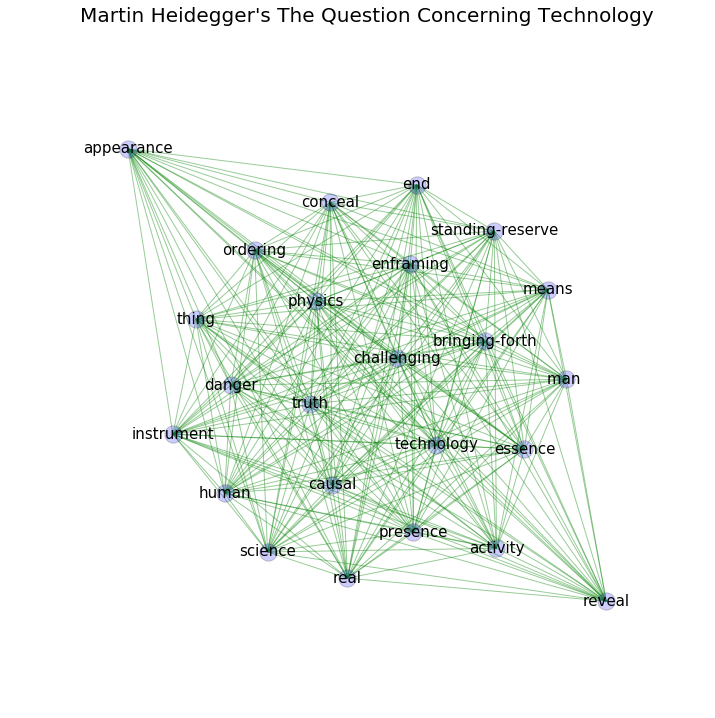

In [15]:

%autoreload 2
from utils import *
G=nx.Graph()

for eds,wei in dict_occurences.items():
#     print ed,wei
    ed=eds.split(' - ')
    
    G.add_edge(ed[0],ed[1],weight=wei)
    G.add_node(ed[0],label=ed[0])
    G.add_node(ed[1],label=ed[1])
# print G.nodes(data=True)


pos=nx.spring_layout(G,scale=50,k=0.55,iterations=50)
sstt="Martin Heidegger's The Question Concerning Technology"
posit=draw_network(G,sstt,pos=pos,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.4,ealpha=0.4,labelfont=15)

print len(G.nodes())
print G.degree()

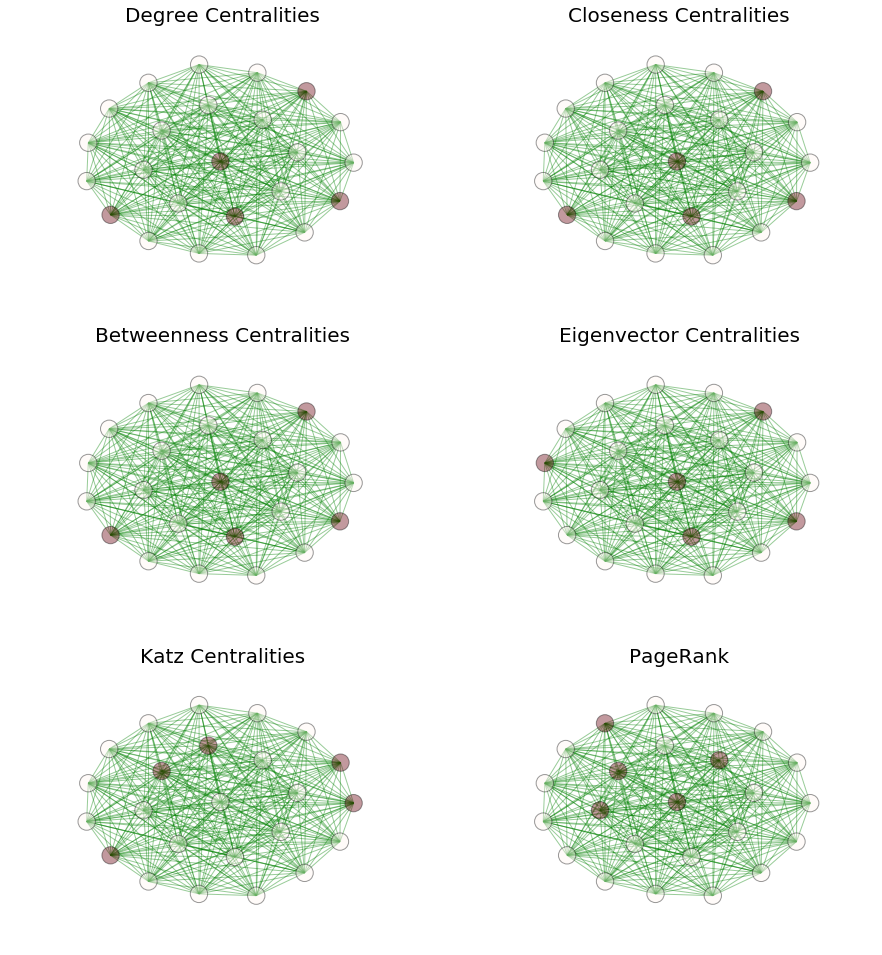

In [9]:
draw_centralities_subplots(G,pos,withLabels=False,labfs=5,figsi=(15,22))



Number of communities of Martin Heidegger's The Question Concerning Technology = 1
Community partition of Martin Heidegger's The Question Concerning Technology:
[['real', 'challenging', 'danger', 'enframing', 'essence', 'standing-reserve', 'human', 'technology', 'causal', 'bringing-forth', 'end', 'instrument', 'ordering', 'science', 'presence', 'appearance', 'conceal', 'man ', 'thing', 'truth', 'activity', 'means', 'physics', 'reveal']]
Community modularity of Martin Heidegger's The Question Concerning Technology = 0.0000


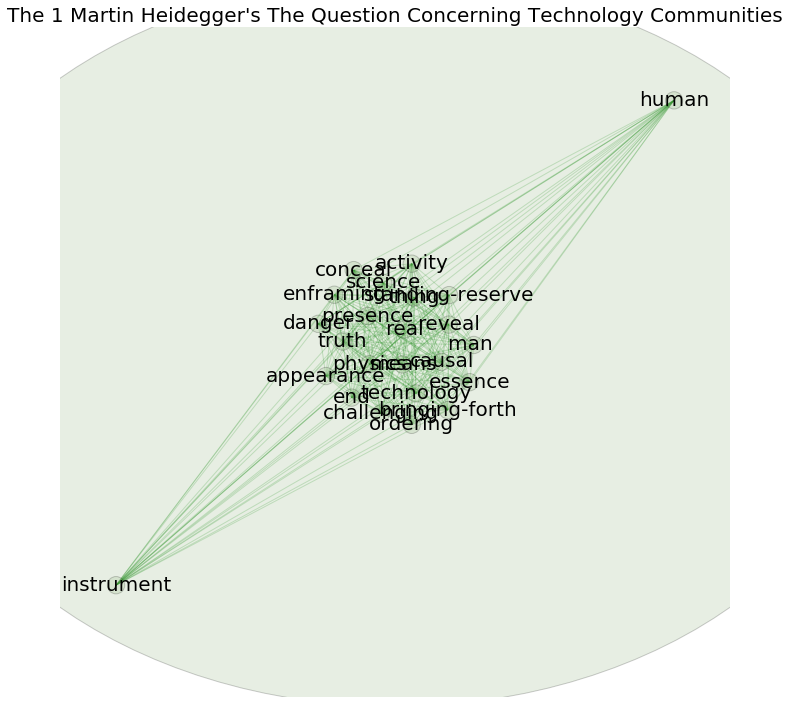

In [10]:

from chAs import draw_comms,modul_arity
import community as comm

part=comm.best_partition(G) 
print 'Number of communities of %s = %i' %(sstt, max(part.values())+1)
print 'Community partition of %s:' %(sstt)
parLis=[]
partdi={}
for i,k in part.items():
    if k not in partdi:
        partdi[k]=[i]
    else:
        partdi[k].append(i)
for i,k in partdi.items():
    parLis.append(k)
print parLis
nodper={i:i for i in G.nodes()}
print 'Community modularity of %s = %.4f' %(sstt, comm.modularity(part,G))

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.2
vcc={}
sstta="The %s %s Communities" %(max(part.values())+1,sstt)

draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta)

